# AMAT503:  Lecture 18

March 20, 2018.

Michael Lamoureux

We are doing multiresolution analysis on the line today.

Based on the .pdf file with the name MRA...  but now with code.


In [1]:
## Some startup commands

%matplotlib inline
from numpy import * 
from scipy import *
from matplotlib.pyplot import *

## 1. Multiresolution Analysis

Behind all these wavelets is the idea that a signal (sound, music, images) can be studied at different levels of resolution. For instance, we are used to thinking of computer pictures at different resolutions: low resolution of 72 dots per inch on the screen (low rez), 300 dots per inch on a cheap printer (medium rez), and 1200 dots per inch on a better printer (high rez). Digital audio also comes in different resolutions – a cheap MP3 player might stores sounds at a low resolution, while an expensive digital-audio recording system will store sounds at a higher resolution, that sounds better to our ears.|

### 1.1 Subspaces of various resolutions

The collection of low-rez representations of various signals could be called a space $V_{low}$, the medium-rez signals called $V_{med}$ and the high-rez signals called $V_{high}$. Since the high rez signals contain more detail, they can represent more signals (or images), and so $V_{high}$ is a bigger collection. So we expect these spaces to be ordered, from smallest to biggest, as
$$V_{low} ⊆ V_{med} ⊆ V_{high}.$$
Mathematically, we extend this idea to an infinite sequence of spaces $V_j$ ordered like this:
$$ \ldots \subset V_2 \subset V_1 \subset V_0 \subset V_{−1} \subset V_{−2} \ldots, $$
where the spaces on the left are signals of lower resolution, and on the right of high resolution. Each $V_j$ is a linear subspace of our set of signals, usually the square integrable functions on the real line, denoted, $L^2(R)$. (Although for images, we could use $L^2(R^2)$, the functions on the plane.)

The funny choice of index j going from positive to negative (Daubechies’ convention) is because we should think of index j as indicating, roughly, the relative size of features that can be resolved in the given resolution. So $V_0$ resolves features of size $2^0 = 1$ unit, while $V_1$ resolves features of size
$2^1 = 2$ units, which is lower resolution. The space $V_{−1}$ resolves features of size $2^{−1} = 0.5$, which is a finer resolution.
As we go up in resolution, we should be able to resolve any signal perfectly, so we require that the union of all the subspaces spans our signal space:
$$ \cup V_j = L^2(R).$$
On the other hand, as we go to lower and lower resolution, eventually we can resolve nothing, so
we require that the intersection of all these subspaces is just the zero function:
$$ \cap V_j = 0.$$


### 1.2 The scaling function

To get going on wavelets, we assume there is a special function $\phi(t)$ called the scaling function, that has the amazing property that it, and its translates (only integer translates!), form an orthonormal basis for the space $V_0$.
This is a huge assumption, but we know a simple example where it works. Take  $\phi(t)$ to be the unit step function,
$$\phi(t) = 1 \mbox{ for $0\leq t \leq 1$, zero otherwise.}$$
This function $\phi(t)$ and its (integer) translates $\phi(t−1), \phi(t−2), \phi(t−3),$ etc. will form an orthonormal basis for something (since these functions have inner product zero with each other, and have unit norm). Think a bit and you realize the space they span is the space of piecewise constant functions that have discontinuities only at the integers $t = 0, \pm 1, \pm 2, \ldots$.

We can graph a few of them and take a linear combination, like this:

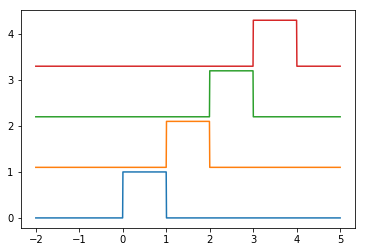

In [8]:
def phi(t):
    return (t>=0)*(t<=1)


t = linspace(-2,5,1000)
plot(t,phi(t),t,1.1+phi(t-1),t,2.2+phi(t-2),t,3.3+phi(t-3));

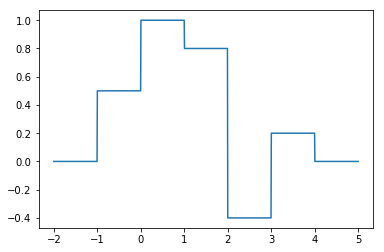

In [11]:
# A linear combination of translates gives a piecewise constant function
plot(t,.5*phi(t+1)+1.0*phi(t) + .8*phi(t-1)-.4*phi(t-2,)+.2*phi(t-3));

The next thing we assume is that shrinking $\phi(t)$ and its translates by a factor of two gives the
higher resolution space, $V_{−1}$, and stretching it by two gives the lower resolution space $V_1$. That is,$\phi(2t)$ and its translates span $V_{−1}$, while $\phi(t/2)$ and its translates span $V_1$.
Again, this is a huge assumption, but we can see how it works for our simple case of piecewise continuous functions. The function $\phi(2t)$ is a step function of width one-half (so it sees finer detail), as
$$\phi(2t) = 1 \mbox{for $0\leq t \leq 0.5$ and zero otherwise,} $$
while the function $\phi(t/2)$ is a step function of width two. In the figure below we see how fat versions of $\phi$ add up to low resolution signals, while skinny versions of $\phi$ add up to higher resolution signals. 


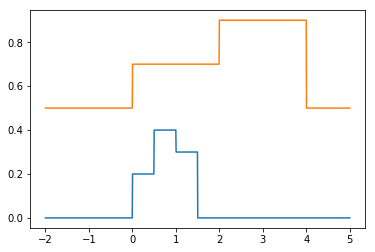

In [16]:
plot(t,.2*phi(2*t)+.4*phi(2*t -1) + .3*phi(2*t -2),t,.5 + .2*phi(t/2) + .4*phi(t/2 -1 ));

The point is, for the step function, the scaled version $\phi(2t)$ and its translates will general the space
of piecewise constant function, with jumps at the half integers $0, \pm 1/2, \pm 1, \pm 3/2 \ldots$. On the other hand, the fat version $\phi(t/2)$ and its translates will general the space of piecewise constant function, with jumps at the even integers $0, \pm 2, \pm 4, \pm 6 \ldots$.
The functions $\phi(2t), \phi(2t − 1), \phi(2t − 2), \phi(2t − 3), \ldots$ will span the higher resolution space $V_{−1}$. Similarly, the functions $\phi(t/2), \phi(t/2 − 1), \phi(t/2 − 2), \phi(t/2 − 3), \ldots$ will span the lower resolution space $V_1$. More generally, we define a family of functions $\phi_{j,k}$ as
 $$\phi_{j,k}(t)= \frac{1}{2^{j/2}}\phi(\frac{t}{2^j} −k).$$
The factor $\frac{1}{2^{j/2}}$ is to ensure this function has unit norm. For each j, the function $\phi_{j,0}$ and its
translates $\phi_{j,k}$ form an orthonormal basis for space $V_j$.

   So this function $\phi(t)$ is a pretty amazing function. By scaling it, and translating it, we can build all the spaces $V_j$ in the multiresolution analysis. The step function is one example, originally built by Haar, but we will see others built by Daubechies and others. The figures below show a few other interesting scaling functions.
   


In [18]:
from pywt import *


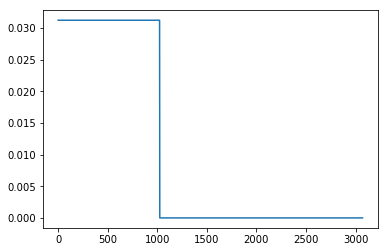

In [70]:
w = Wavelet('db1')
h = w.dec_lo
y = [1, 0, 0, 0]
for k in range(10):
    x = convolve(y,h)
    y = zeros(2*size(x))
    y[0:size(y):2] = x

plot(x);

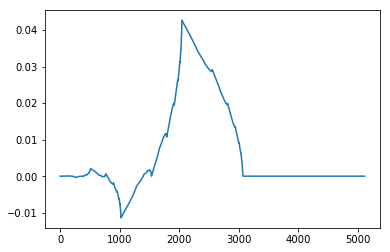

In [71]:
w = Wavelet('db2')
h = w.dec_lo
y = [1, 0, 0, 0]
for k in range(10):
    x = convolve(y,h)
    y = zeros(2*size(x))
    y[0:size(y):2] = x

plot(x);

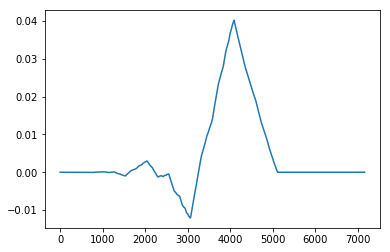

In [64]:
w = Wavelet('db3')
h = w.dec_lo
y = [1, 0, 0, 0]
for k in range(10):
    x = convolve(y,h)
    y = zeros(2*size(x))
    y[0:size(y):2] = x

plot(x);

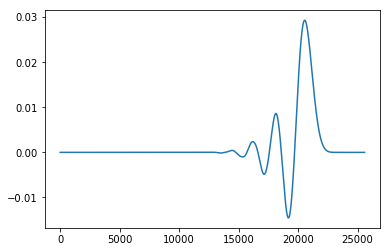

In [76]:
w = Wavelet('db12')
h = w.dec_lo
y = [1, 0, 0, 0]
for k in range(10):
    x = convolve(y,h)
    y = zeros(2*size(x))
    y[0:size(y):2] = x

plot(x);

Looking at these figures, we see that these scaling functions are all continuous, unlike the step function we looked at above. Also, some of these functions are smoother than other ones. So, if you were trying to represent smooth functions as a linear combo of a scaling function, it might make sense to
choose a smoother scaling function. A spiky signal might be better represented as a linear combo of translates of a spiky scaling function. The point is, you have a choice of scaling functions, and a choice of what might work for the signals you are examining.

You might notice these scaling functions each have a positive integral (the functions are more positive than negative). So these are NOT wavelets! They are SCALING FUNCTIONS. 

### 1.3 The scaling relation

The “scaling relation” makes the connection between the filter coefficients and the scaling function. The point is, the lower resolution function $\phi(t/2)$ is in space $V_1$, which is a subspace of $V_0$, so we
should be able to write it as a sum of basis elements for $V_0$. Normalizing, we write
the scaling relation as 
$$\frac{1}{\sqrt{2}}\phi(\frac{t}{2}) = \sum_k h_k \phi(t − k)$$
which expresses the function $\frac{1}{\sqrt{2}}\phi(\frac{t}{2} )$ as a linear combination of the basis vectors $\phi$. The
coefficients $h_k$ are exactly the coefficients of the lowpass filter used in the discrete wavelet transform that we have been discussing in class.

You might like to check, in the case of the unit step function $\phi(t)$, that we have $$\frac{1}{\sqrt{2}}\phi(\frac{t}{2}) = \frac{1}{\sqrt{2}}\phi(t) + \frac{1}{\sqrt{2}}\phi(t − 1),$$
which just says the fat step function (of width two) is a sum of two skinny step functions (each of
width one). So in this case, the lowpass filter coefficients are 
$[h_0 , h_1 ] = [ 1/\sqrt{2} , 1/\sqrt{2} ]$. Which is what we 
expect for the Haar wavelet construction. For the other scaling functions, we get different values for the $h_k$.

Can you convince yourself that by choosing to normalize the function $\phi$ and its scaled versions, we can conclude that
 $$\sum_k |h_k|^2 = 1?$$

###  1.4 The wavelet function

Once you have the coefficients $h_k,$ we define the wavelet function $\psi(t)$ as a linear combination of translates of the scaling function, using the equation
$$\frac{1}{\sqrt{2}}\psi(\frac{t}{2}) = \sum_k (-1)^{k-1}h_{-k-1} \phi(t − k).$$
This looks a lot like the scaling relation mentioned above, but with coefficients $h_k$ modified somewhat. The coefficients $g_k = (−1)^{k−1}h_{−k−1}$ are of course the high pass filter coefficients we have seen before in the discrete wavelet transformation. (Note how they alternate sign, and go in the reverse order as the $h_k$.)
This just defines a function, so let’s plot a few of them, in the figure below. Notice how the first one, for the Haar wavelet transform, is a step up and step down combined. Its integral is zero. Eyeballing the three other functions in the figures below, we can estimate the integral of each is zero (the area under the curve and above the x-axis, exactly cancels the area under the x-axis.) This zero-integral is a typical feature of the wavelet function, and not of the scaling function.

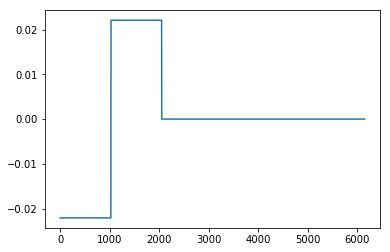

In [77]:
w = Wavelet('db1')
h = w.dec_lo
g = w.dec_hi
y = [1, 0, 0, 0]
x = convolve(y,g)
y = zeros(2*size(x))
y[0:size(y):2] = x

for k in range(10):
    x = convolve(y,h)
    y = zeros(2*size(x))
    y[0:size(y):2] = x

plot(x);

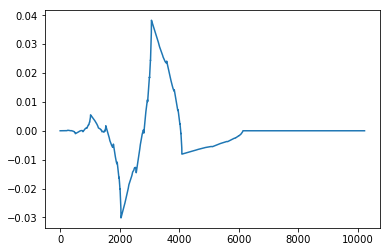

In [78]:
w = Wavelet('db2')
h = w.dec_lo
g = w.dec_hi
y = [1, 0, 0, 0]
x = convolve(y,g)
y = zeros(2*size(x))
y[0:size(y):2] = x

for k in range(10):
    x = convolve(y,h)
    y = zeros(2*size(x))
    y[0:size(y):2] = x

plot(x);

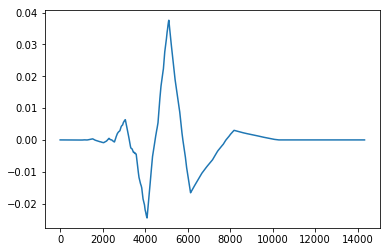

In [79]:
w = Wavelet('db3')
h = w.dec_lo
g = w.dec_hi
y = [1, 0, 0, 0]
x = convolve(y,g)
y = zeros(2*size(x))
y[0:size(y):2] = x

for k in range(10):
    x = convolve(y,h)
    y = zeros(2*size(x))
    y[0:size(y):2] = x

plot(x);

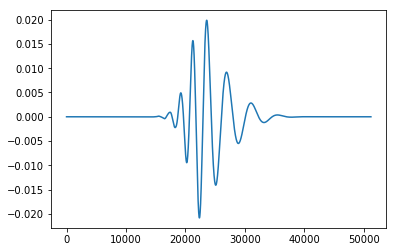

In [81]:
w = Wavelet('db12')
h = w.dec_lo
g = w.dec_hi
y = [1, 0, 0, 0]
x = convolve(y,g)
y = zeros(2*size(x))
y[0:size(y):2] = x

for k in range(10):
    x = convolve(y,h)
    y = zeros(2*size(x))
    y[0:size(y):2] = x

plot(x);

### 1.5  The wavelet subspaces

Translates and scaling of the wavelet function $\psi(t)$ will also generate some sort of subspaces. The magic is that they combine with the nested $V_j$ in a very specific way.
So, for instance, the function $\psi(t)$ is a linear combination of the scaling function $\phi(2t)$ and its translates (which span $V_{−1)}$, so it must be that the wavelet $\psi(t)$ and its translates are all functions
in $V_{−1}$. By choose the coefficients carefully (namely, the condition that $|H(\omega)|^2+|H(\omega+0.5)|^2 = 2$), we can make $\psi(t)$ and its translates form an orthonormal basis for a subspace in $V_{−1}$.
We call this subspace $W_0$, the set of functions spanned by the wavelet $\psi(t)$ and its integer translates. It is now a simple exercise in linear algebra to convince ourselves that the spaces $V_0$ and $W_0$ are
orthogonal to each other, and span the bigger space $V_{−1}$. That is, we can write an orthogonal sum 
$$V_0 \oplus W_0 = V_{−1}. $$

This of course extends to all the spaces in the multiresolution analysis, so we can write
$$ V_j \oplus W_j = V_{j−1}, $$
where the $V_j$ is spanned by the orthonormal basis of the $\phi_{j,k}(t)$ while $W_j$ is spanned by the orthonormal basis formed by the functions $\psi_{j,k}(t)$ defined by
$$\psi{j,k}(t)= \frac{1}{s^{j/2}}\psi(\frac{t}{2^j}−k). $$
We’ve seen this scaled translation definition before, with the scaling function.

### 1.6 The wavelet basis

So, we know that $V_1 \oplus W_1 = V_0$. But expanding $V_1$ as $V_2 \oplus W_2 = V_1$. we can write
$$(V_2 \oplus W_2)\oplus W_1 = V_1 \oplus W_1 = V_0.$$
Repeating this N-times, we find that
$$V_N \oplus W_N \oplus W_{N−1} \oplus W_{N−2} \oplus \cdot \oplus W_1 = V_0.$$
Taking the limits as $N \rightarrow \infty$, and noting that $V_N$ goes to zero, we can write
$$\cdots \oplus W_N \oplus W_{N−1} \oplus W_{N−2} \oplus\cdot\oplus W_1 =V_0.$$
In terms of linear vector spaces, this says that the space $V_0$ is a direct sum of smaller spaces, namely $W_1,W_2,W_3,\ldots$.

In terms of basis functions, this says that the space $V_0$ is spanned by the orthogonal functions
$$\psi_{j,k}(t), \qquad j = 1,2,3,\ldots, \quad k \in Z.$$
This is a remarkable statement. It says any function in $V_0$ can be expressed uniquely as a linear combination of the functions $\psi_{j,k}(t)$. In fact, we can write $f \in V_0$ as
$$f(t) =  \sum_{j>0,k} x_{j,k} \psi_{j,k}(t),$$
where the coefficients $x_{j,k}$ are given by an inner product  
 $$ x_{j,k} = \langle f,\psi_{j,k} \rangle. $$

This is getting pretty abstract. But the key point is that the **wavelet** function $\psi(t)$ is the important one. Translates and scalings of this function are enough to describe any function $f$ in $V_0$. Somehow, we are able to forget about the scaling function $\phi(t)$.

By the way, there is nothing special about $V_0$. We could start at any $V_j$, and discover that $$\cdots\oplus W_N \oplus W_{N−1} \oplus W_{N−2} \oplus \cdots\oplus W_{j−1} =V_j.$$
Thus the space $V_j$ is described as a direct sum of wavelet spaces $W_{j′}$ , over all $j′ > j$.

### 1.7 Connection with the discrete wavelet transform

We recall that when we were looking at the discrete wavelet transform, we had sequences, and we convolved them with filter coefficients. Let’s see how that comes up here.
Take a function $f$ in $V_0$. We can compute a sequence of coefficients $y_k$ by expanding $f$ in terms of the scaling funtion $\phi(t)$ and its translates, so
$$f(t) =   \sum y_k \phi(t − k),$$
where the sequence of coefficients $y_k$ are given by a simple inner product
$$y_k = \langle f, \phi_{0,k}\rangle.$$
This sequence $y_k$ is where we apply the the discrete wavelet transform.
Convolving $y_k$ with $h_k$ and downsampling gives some new coefficients, call them $y_{1,k}$. What are they? They are precisely the coefficients that describe $f$ in the part $V_1$ of the decomposition
$$V_0 = V_1 \oplus W_1.$$
Convolving $y_k$ with the $g_k$ and downsampling gives other coefficients, call them $x_{1,k}$. These are the coefficients that describe $f$ in the part $W_1$ of that same decomposition. In terms of basis vectors, we can write
$$f =   \sum_k y_{1,k}\phi_{1,k}(t) +   \sum_k x_{1,k}\psi_{1, k}(t).$$
Now of course, we could compute the coefficients $y_{1,k}$ and $x_{1,k}$ using an inner product of $f$ with the corresponding (scaled) scaling and wavelet functions. But we don’t! It is much faster to compute these guys by convolving the initial sequence $y_k$ with low pass filter $h_k$ and the high pass filter $g_k$.
So, breaking up $V_0$ into the two parts $V_1$ and $W_1$ corresponds to the lowpass (discrete) filtering, and the highpass filtering. Iterating the discrete wavelet transform just takes $V_1$ and breaks it up into $V_2$ plus $W_2$. So $W_1$ is left alone (that is, we don’t change the output of the high pass part), and we take the coefficients from $V_1$ (the lowpass part) and apply the wavelet transform to this.
And repeat!

### 1.8 The big lie

I’ve heard Gilbert Strang point out what he calls “the big lie of wavelet theory” which is that this initial sequence of coefficients
 $$y_k = \int f(t) \overline{\phi(t-k)} \, dt,$$
is never really computed in practice. Usually, we use an approximation of the form
 $$y_k = \int f(t) \overline{\phi(t-k)} \, dt \approx f(k)$$
where the integral is replaced by (integer-spaced) samples of the function $f(t)$.
Now, this might be a reasonable approximation for slowly varying functions (continuous, smooth), and for reasonable scaling functions (eg. compact support near zero). I think Strang’s point is there is a shortage of research on just how good or how bad this approximation might be, and the consequences of that approximation.
Keep in mind that you don’t need to begin with functions in $V_0$. You can take any continuous function $f$ in $L^2(R)$, take evenly samples $y_k = f(2^jk)$ and get an approximation in space $V_j$, as a linear combination of basis functions,
$$f(t) ≈  \sum_k y_k \phi_{j,k}(t).$$
Again, if f is slowly changing with respect to this j-th level of basis functions, this should be a pretty good approximation.


### 1.9 Finding $\phi$ and $\psi$

For interesting cases, we never compute the scaling and wavelet functions directly. Usually, we pick the coefficients hk first, subject to the constraint 
$|H(\omega)|^2 + |H(\omega + 0.5)|^2 = 2$, and from the $h_k$ we figure out what the functions $\phi$ and $\psi$ have to be.

From the scaling relation, we find the Fourier transform of $\phi$ satisfies
$$\hat{\phi}(\omega) = H(\frac{\omega}{2})\hat{\phi}(\frac{\omega}{2}).$$
  
Iterating this, we have

$$\begin{eqnarray}
\hat{\phi}(\omega) &=& H(\frac{\omega}{2})\hat{\phi}(\frac{\omega}{2}) \\
&=& 
H(\frac{\omega}{2})
H(\frac{\omega}{4})
\hat{\phi}(\frac{\omega}{4}) \\
&=& 
H(\frac{\omega}{2})
H(\frac{\omega}{4})
H(\frac{\omega}{8})
\hat{\phi}(\frac{\omega}{8}) \\
&\cdots&\\
&=&
\left[
\prod_{k=1}^\infty H(\frac{\omega}{2^k})
\right]
\hat{\phi}(0).
\end{eqnarray}
$$

 Usually, we normalize to take $\phi(0) = 1$. Thus we have determined $\phi$ in terms of the lowpasss transfer function $H(\omega)$, given by its Fourier transform
$$ \hat{\phi}(\omega) = \prod_{k=1}^\infty H(\frac{\omega}{2^k}).$$

A similar calculation for the wavelet function ψ shows
$$ \hat{\psi}(\omega) = G(\frac{\omega}{2}) \prod_{k=2}^\infty H(\frac{\omega}{2^k}).$$

It is an interesting exercise to do this calculation for the Haar wavelet and scaling function. Remember to normalize the filter so that $H(0) = 1$, to insure convergence of the infinite product.

In practice, we don’t even need to take the infinite product. Instead, simply iterate the process of filtering by coefficients $h_k$, followed by downsampling. This is equivalent to the infinite product above. See the appendix below for some clues on this. 

(We did the algebra for this in class.)

## Taking the limit


So we look at this infinite product
$$ \hat{\phi}(\omega) = \prod_{k=1}^\infty H(\frac{\omega}{2^k}).$$
For this to work, we'd better normalize so that it at least converges at $\omega = 0$. In that case, all the $H(\frac{\omega}{2^k}) = H(0)$ so we need to set that equal to 1.
That means we need
$$H(0) = \sum_k h_k e^{2\pi i k * 0} = \sum_k h_k = 1.$$
This is just a slightly different choice of normalization. So go with it.

In the Haar case, we take $[h_0,h_1] = [1/2, 1/2]$ so that $h_0 + h_1 = 1$. We then find
$$H(\omega/2) = (1/2)(1 + e^{2\pi i \omega/2})$$
and
$$H(\omega/4) = (1/2)(1 + e^{2\pi i \omega/4}),$$
and so on. If we take a product of a few of them, we see with $z = e^{2\pi i \omega/8}$ that
$$\begin{eqnarray*}
H(\omega/2)H(\omega/4)H(\omega/8) 
&=&
(1/2^3)(1+ e^{2\pi i \omega/2})(1+ e^{2\pi i \omega/4})(1+ e^{2\pi i \omega/8}) \\
&=&
(1/2^3)(1+ z^4)(1+ z^2)(1+ z) \\
&=& 
(1/2^3)(1+ z^4)(1+ z + z^2 + z^3) \\
&=& (1/2^3)(1 + z + z^2 + z^3 + z^4 + z^5 + z^6 + z^7) \\
&=& \frac{1}{2^3}\frac{1-z^8}{1-z} \\
&=& \frac{z^4}{2^3}\frac{z^4 - z^{-4}}{z^{1/2} - z^{-1/2}}.
\end{eqnarray*}
$$
Now, remembering that we set  $z = e^{\pi i \omega/4}$, these differences are sine functions, so 
$$H(\omega/2)H(\omega/4)H(\omega/8) = 
\frac{e^{\pi i\omega}}{2^3} \frac{\sin(\pi \omega)}{\sin(\pi \omega/2^3)}.$$
Generalize to a product of n factors, we get
$$\prod_{k=1}^n H(\frac{\omega}{2^k}) = 
\frac{e^{\pi i\omega}}{1} \frac{\sin(\pi \omega)}{2^n\sin(\pi \omega/2^n)}.$$
For $n$ large, we know $\pi \omega/2^n$ is small, so $\sin(\pi \omega/2^n) \approx \pi \omega/2^n$. Thus taking limits as $n$ goes to infinity, 
$$ \lim 2^n \sin(\pi \omega/2^n) = \lim 2^n \cdot(\pi \omega/2^n) = \pi \omega.$$
So in the infinite product, we get
$$ \hat{\phi}(\omega)=\prod_{k=1}^\infty H(\frac{\omega}{2^k})
= e^{\pi i\omega} \frac{\sin(\pi \omega)}{\pi \omega}.$$
This is a sinc function, modulated by $e^{\pi i\omega}$. Remember, the Fourier transform of the symmetrix step function give the sinc function, So the function $\phi$ is just a symmetric step function, translated by $1/2$. (Because of the modulating factor $e^{\pi i \omega}$.)

That is, $\phi(t) = 1$ on the interval $[0,1]$ and zero everywhere else. Which is what we expected, but it is nice to see that the limits worked out. 

### What does this product have to do with convolution?

We, the point is that that the $H(\frac{\omega}{2^j})$ are are polynomials in variable $z = e^{2\pi i \omega/2^j}$ as we saw in the example above. Now, we multiply polynomials by doing discrete convolution on the coefficients of that polynomial. The different powers of the powers $\frac{\omega}{2^j}$ are accounted for by squareing the $z$'s, or equivalently inserting zeros in the the list of coefficients in the polynomial.

An example might make this clear. Let's see for the Haar example.

Step 1: with $z = e^{2\pi i \omega/2}$,
$$H(\frac{\omega}{2}) = (\frac{1}{2} + \frac{1}{2}z)$$

Step 2: with $z = e^{2\pi i \omega/4}$,
$$H(\frac{\omega}{2}) H(\frac{\omega}{4}) = 
(\frac{1}{2} + \frac{1}{2}z^2)\cdot (\frac{1}{2} + \frac{1}{2}z)
= (\frac{1}{4} + \frac{1}{4}z +\frac{1}{4}z^2 + \frac{1}{4}z^3),$$
where you should notice we convolved $[1/2,0,1/2,0]$ with $[1/2, 1/2]$. So the point is that we inserted two zeros into the list of polynomial coefficients.

Now, in step 3 we have $z = e^{2\pi i \omega/8}$ and so
$$\begin{eqnarray*}
H(\frac{\omega}{2}) H(\frac{\omega}{4})H(\frac{\omega}{8}) &=& \\
 (\frac{1}{4} + \frac{1}{4}z^2 +\frac{1}{4}z^4 + \frac{1}{4}z^6)(\frac{1}{2}+\frac{1}{2}z).
\end{eqnarray*}
$$
So here again, we inserted some zeros to get a coeffient string $[1/4, 0, 1/4, 0, 1/4, 0 , 1/4, 0]$ convolved with $[1/2, 1/2]$.

Let's look at some code. The key steps are the convolution and the insertion of zeros. And we iterate. 

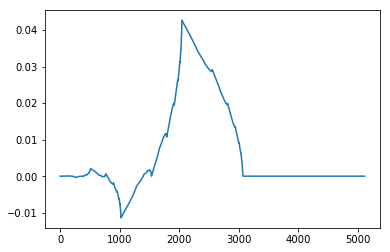

In [116]:
w = Wavelet('db2')  
h = w.dec_lo       # these are the coefficients h_k
y = [1,0,0,0]   # the initial impulse. Add some zeros to make it pretty
for k in range(10):
    x = convolve(y,h)     # convolution with the h_k
    y = zeros(2*size(x))
    y[0:size(y):2] = x    # expand the list of coeffs y_k, insert zeros into every other place

plot(x);

In [117]:
(size(x)+size(h)-1)/1024

5.0

You can replace the first $h_k$ with the $g_k$ to get the wavelet function. That was done above, but here it is again. 

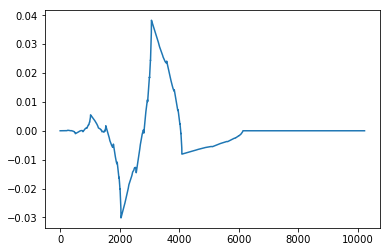

In [115]:
w = Wavelet('db2')
h = w.dec_lo
g = w.dec_hi
y = [1, 0, 0, 0]
x = convolve(y,g)
y = zeros(2*size(x))
y[0:size(y):2] = x

for k in range(10):
    x = convolve(y,h)
    y = zeros(2*size(x))
    y[0:size(y):2] = x

plot(x);

## Exercise

Let's try this decomposition on a real function, like a truncated sinusoid, or a Morlet wavelet, or a chirp signal. This should involve the discrete wavelet transform in the end.

### Appendix

Here is some simple MATLAB code I wrote to draw the scaling function$\phi(t)$ and the wavelet function $\psi(t)$ in the figures above. You can look at the Python code above if you prefer. 

```
% Script ScalingFunc.m produces a Daubechies scaling function
h = 2*dbwavf(’db4’);
y = [1 0 0 0];
for k=1:10
    x = conv(y,h);
    y = zeros(1,2*length(x));
    y(1:2:length(y)) = x;
end
plot(linspace(0,3,length(x)),x)
% Script WaveletFunc.m produces a Daubechies wavelet function
h = 2*dbwavf(’db4’);
g = -((-1).^(1:length(h))).*h(length(h):-1:1);
y = [1 0 0 0];
    x = conv(y,g);
    y = zeros(1,2*length(x));
    y(1:2:length(y)) = x;
for k=1:10
    x = conv(y,h);
    y = zeros(1,2*length(x));
    y(1:2:length(y)) = x;
end
plot(linspace(0,3,length(x)),x)
ylim([-1.4 1.4])
```